In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load data and prepare
df = pd.read_csv('shopping_behavior_updated.csv')

frequency_subscription = df.groupby(['Frequency of Purchases', 'Subscription Status']).size().unstack(fill_value=0)
avg_purchases = df.groupby('Frequency of Purchases')['Previous Purchases'].mean().round(2)

frequency_data = pd.DataFrame({
    'Subscribed': frequency_subscription["Yes"],
    'Non-subscribed': frequency_subscription["No"],
    'Avg_Previous_Purchases': avg_purchases
})
print(frequency_data)

                        Subscribed  Non-subscribed  Avg_Previous_Purchases
Frequency of Purchases                                                    
Annually                       160             412                   24.56
Bi-Weekly                      140             407                   24.79
Every 3 Months                 154             430                   24.96
Fortnightly                    153             389                   25.27
Monthly                        149             404                   25.28
Quarterly                      140             423                   26.85
Weekly                         157             382                   25.77


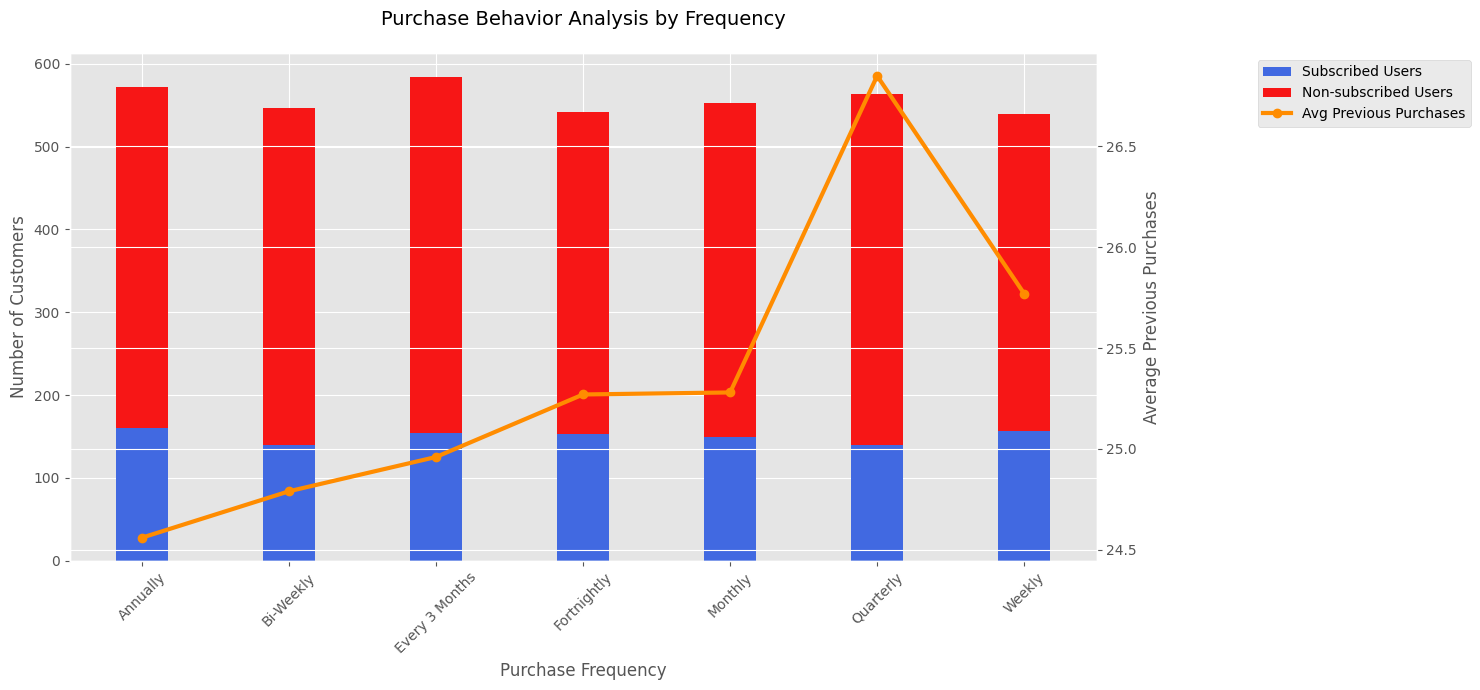

In [8]:
#plot and settings
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(15, 7))  
bar_width = 0.35
index = range(len(frequency_data.index))

#bar
ax1.bar(index, frequency_data['Subscribed'], bar_width, 
        label='Subscribed Users', color='#4169E1')
ax1.bar(index, frequency_data['Non-subscribed'], bar_width,
        bottom=frequency_data['Subscribed'], label='Non-subscribed Users', 
        color='#F71616') 

#  average purchases
ax2 = ax1.twinx()
ax2.plot(index, frequency_data['Avg_Previous_Purchases'], 
         color='#FF8C00', marker='o', linewidth=3, 
         label='Avg Previous Purchases')


ax1.set_xlabel('Purchase Frequency', fontsize=12)
ax1.set_ylabel('Number of Customers', fontsize=12)
ax2.set_ylabel('Average Previous Purchases', fontsize=12)
ax1.set_title('Purchase Behavior Analysis by Frequency', pad=20, fontsize=14)
ax1.set_xticks(index)
ax1.set_xticklabels(frequency_data.index, rotation=45)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
          bbox_to_anchor=(1.15, 1),  # legend pos modify
          loc='upper left',
          fontsize=10)

plt.subplots_adjust(right=0.85)  
plt.tight_layout()
plt.show()